In [15]:
ReloadProject('deep_learning')

notebook_init.py imported and reloaded
reloaded: a3c_impl
forwarded symbol: a3c_impl
reloaded: base
forwarded symbol: base
reloaded: circular_world_env
forwarded symbol: circular_world_env
reloaded: environment_impl
forwarded symbol: environment_impl
reloaded: guided_environments
forwarded symbol: guided_environments
reloaded: gym
forwarded symbol: gym
reloaded: interval_world_env
forwarded symbol: interval_world_env
reloaded: keras
forwarded symbol: keras
reloaded: layers
forwarded symbol: layers
reloaded: logging
forwarded symbol: logging
reloaded: model_builder
forwarded symbol: model_builder
reloaded: models
forwarded symbol: models
reloaded: numpy
forwarded symbol: numpy
reloaded: numpy_util
forwarded symbol: numpy_util
reloaded: optimizers
forwarded symbol: optimizers
reloaded: policy_impl
forwarded symbol: policy_impl
reloaded: qfunc_impl
forwarded symbol: qfunc_impl
reloaded: runner_extension_impl
forwarded symbol: runner_extension_impl
reloaded: runner_impl
forwarded symbol: r

# WebSite Example
Parameters and model shape are taken from:
https://jaromiru.com/2016/10/03/lets-make-a-dqn-implementation/

## Training

In [52]:
batch_size = 64  # used in qfunc and runner.
env = environment_impl.GymEnvironment(gym.make('CartPole-v0'))
qfunc = qfunc_impl.DQN(
    state_space_dim=env.GetStateSpaceDimension(),
    action_space_size=env.GetActionSpaceSize(),
    hidden_layer_sizes=(64,),
    training_batch_size=batch_size,
    discount_factor=0.99,
)
runner = runner_impl.ExperienceReplayRunner(experience_capacity=100000, experience_sample_batch_size=batch_size)

In [54]:
%%time
# Train
logging.ENV.debug_verbosity = 3
policy = policy_impl.GreedyPolicyWithRandomness(epsilon=0.1)
runner.Run(env=env, qfunc=qfunc, policy=policy, num_of_episodes=500)

[02:38:46] q_base.py:390 Episode 0/500: total_reward = 9.00, total_steps=8
[02:38:49] q_base.py:392 Episode 100/500: total_reward = 10.00, total_steps=9
[02:38:55] q_base.py:392 Episode 200/500: total_reward = 10.00, total_steps=9
[02:39:01] q_base.py:392 Episode 300/500: total_reward = 19.00, total_steps=18
[02:39:44] q_base.py:392 Episode 400/500: total_reward = 68.00, total_steps=67
CPU times: user 3min 41s, sys: 416 ms, total: 3min 42s
Wall time: 3min 42s


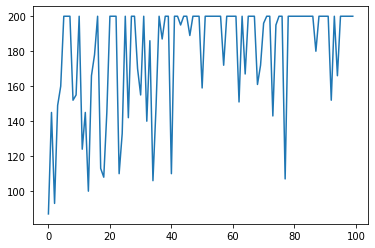

CPU times: user 8min 57s, sys: 1.87 s, total: 8min 59s
Wall time: 9min 1s


In [56]:
%%time
# Train
logging.ENV.debug_verbosity = 4
policy = policy_impl.GreedyPolicyWithRandomness(epsilon=0.1)
runner.Run(env=env, qfunc=qfunc, policy=policy, num_of_episodes=100)

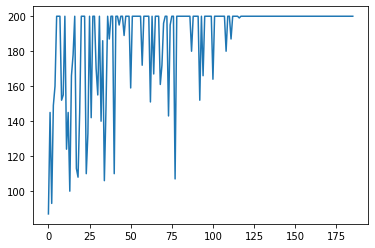

KeyboardInterrupt: 

In [63]:
%%time
# Train
logging.ENV.debug_verbosity = 4
policy = policy_impl.GreedyPolicy()
runner.Run(env=env, qfunc=qfunc, policy=policy, num_of_episodes=100)

In [64]:
qfunc.SaveModel('saved_models/jaromiru_cartpole_v0_07-21.model')

## Demo

In [3]:
demo_env = environment_impl.GymEnvironment(gym.make('CartPole-v0'))
demo_env.TurnOnRendering(True)
demo_env.SetGymEnvMaxEpisodeSteps(500)

batch_size = 64  # used in qfunc and runner.
qfunc = qfunc_impl.DQN(
    state_space_dim=demo_env.GetStateSpaceDimension(),
    action_space_size=demo_env.GetActionSpaceSize(),
    hidden_layer_sizes=(64,),
    training_batch_size=batch_size,
    discount_factor=0.99,
)
runner = runner_impl.ExperienceReplayRunner(experience_capacity=100000, experience_sample_batch_size=batch_size)

W0722 04:07:51.797194 140283768702784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0722 04:07:52.037831 140283768702784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0722 04:07:52.205135 140283768702784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0722 04:07:52.299552 140283768702784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [4]:
qfunc.LoadModel('saved_models/jaromiru_cartpole_v0_07-21.model')

W0722 04:07:59.830176 140283768702784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0722 04:07:59.831066 140283768702784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.



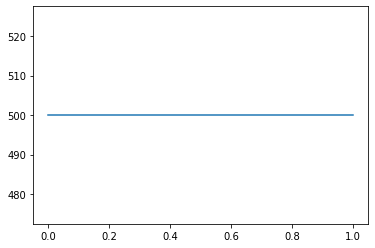

CPU times: user 3.01 s, sys: 477 ms, total: 3.49 s
Wall time: 8.44 s


In [8]:
%%time
logging.ENV.debug_verbosity = 4
policy = policy_impl.GreedyPolicy()
runner.Run(env=demo_env, qfunc=qfunc, policy=policy, num_of_episodes=1)

# My models

## 20-20-20
Try the model that has shape (20, 20, 20).

In [89]:
batch_size = 64  # used in qfunc and runner.
env = environment_impl.GymEnvironment(gym.make('CartPole-v0'))
brain = qfunc_impl.DQN(
    model=qfunc_impl.CreateModel(
        state_shape=env.GetStateShape(),
        action_space_size=env.GetActionSpaceSize(),
        hidden_layer_sizes=(20, 20, 20)),
    training_batch_size=batch_size,
    discount_factor=0.99,
)
runner = runner_impl.ExperienceReplayRunner(experience_capacity=100000, experience_sample_batch_size=batch_size)
runner.AddCallback(runner_extension_impl.ProgressTracer(report_every_num_of_episodes=100))

[19:04:45] c:\Workspace\git\deep_learning\engine\runner_extension_impl.py:58 Episode 100/500: avg_reward = 9.62, avg_steps=8.62 (over 100 episodes)
[19:04:49] c:\Workspace\git\deep_learning\engine\runner_extension_impl.py:58 Episode 200/500: avg_reward = 11.93, avg_steps=10.93 (over 100 episodes)
[19:05:02] c:\Workspace\git\deep_learning\engine\runner_extension_impl.py:58 Episode 300/500: avg_reward = 35.23, avg_steps=34.23 (over 100 episodes)
[19:06:20] c:\Workspace\git\deep_learning\engine\runner_extension_impl.py:58 Episode 400/500: avg_reward = 185.33, avg_steps=184.33 (over 100 episodes)
[19:07:41] c:\Workspace\git\deep_learning\engine\runner_extension_impl.py:58 Episode 500/500: avg_reward = 197.32, avg_steps=196.32 (over 100 episodes)
[19:07:42] c:\Workspace\git\deep_learning\engine\runner_extension_impl.py:72 Total: run 500 episodes, avg_reward = 87.89, avg_steps=86.89


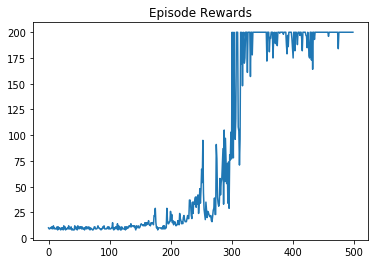

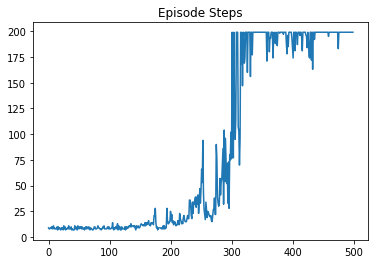

Wall time: 3min 2s


In [90]:
%%time
# Train
logging.ENV.debug_verbosity = 3
policy = policy_impl.GreedyPolicyWithRandomness(epsilon=0.1)
runner.Run(env=env, brain=brain, policy=policy, num_of_episodes=500)

__Conclusion__: the (20, 20, 20) model converts much sooner compared to the (64,) model.

In [93]:
qfunc_brain = brain

In [97]:
states = [[], []]
for tran in runner.SampleFromHistory(size=20):
    print(tran)
    if tran.r > 0:
        states[env.GetChoiceFromAction(tran.a)].append(tran.s)
    else:
        states[1 - env.GetChoiceFromAction(tran.a)].append(tran.s)

(state [[ 0.02318315  0.58242713  0.08012372 -0.42810967]], action [[1. 0.]]) -> state [[ 0.0348317   0.38626725  0.07156153 -0.11128266]]: reward 1.00
(state [[0.77688442 0.18271239 0.01830044 0.45438987]], action [[0. 1.]]) -> state [[0.78053867 0.37757086 0.02738824 0.16753114]]: reward 1.00
(state [[ 0.07219074 -0.21979337 -0.0127479   0.3597516 ]], action [[0. 1.]]) -> state [[ 0.06779487 -0.02449255 -0.00555287  0.06307639]]: reward 1.00
(state [[ 0.03937273  0.00450853 -0.04028056 -0.01137044]], action [[1. 0.]]) -> state [[ 0.0394629  -0.19001329 -0.04050796  0.26833632]]: reward 1.00
(state [[-1.22393435 -0.94591479 -0.10243092 -0.30642735]], action [[1. 0.]]) -> state None: reward 1.00
(state [[-0.01872194 -0.01780948  0.03422948  0.07417699]], action [[0. 1.]]) -> state [[-0.01907813  0.17680546  0.03571302 -0.20751292]]: reward 1.00
(state [[-1.00146948 -0.89419425 -0.05840249 -0.10293925]], action [[1. 0.]]) -> state [[-1.01935337 -1.0884327  -0.06046127  0.17076112]]: rew

In [98]:
states

[[array([[ 0.02318315,  0.58242713,  0.08012372, -0.42810967]]),
  array([[ 0.03937273,  0.00450853, -0.04028056, -0.01137044]]),
  array([[-1.22393435, -0.94591479, -0.10243092, -0.30642735]]),
  array([[-1.00146948, -0.89419425, -0.05840249, -0.10293925]]),
  array([[1.26898112, 0.90985765, 0.05516422, 0.0211102 ]]),
  array([[ 0.07734736,  0.38238581,  0.00808368, -0.43614473]]),
  array([[ 0.32898555,  0.54686486,  0.01403588, -0.30861282]]),
  array([[ 0.55113367,  0.40094633,  0.01053951, -0.12118495]]),
  array([[ 0.2304714 ,  0.34016697,  0.01694664, -0.02476815]]),
  array([[ 0.81349645,  1.31489248,  0.14548658, -0.00726391]]),
  array([[-0.50330022,  0.36431455, -0.05797559, -0.07904508]]),
  array([[ 1.29932225,  1.26296664,  0.08618098, -0.25595331]]),
  array([[ 0.07301362,  0.34381018, -0.01331721, -0.5010894 ]])],
 [array([[0.77688442, 0.18271239, 0.01830044, 0.45438987]]),
  array([[ 0.07219074, -0.21979337, -0.0127479 ,  0.3597516 ]]),
  array([[-0.01872194, -0.017809

In [99]:
use_states_1 = states[0][:5]
use_states_2 = states[1][:5]

In [100]:
use_states_1

[array([[ 0.02318315,  0.58242713,  0.08012372, -0.42810967]]),
 array([[ 0.03937273,  0.00450853, -0.04028056, -0.01137044]]),
 array([[-1.22393435, -0.94591479, -0.10243092, -0.30642735]]),
 array([[-1.00146948, -0.89419425, -0.05840249, -0.10293925]]),
 array([[1.26898112, 0.90985765, 0.05516422, 0.0211102 ]])]

In [101]:
use_states_2

[array([[0.77688442, 0.18271239, 0.01830044, 0.45438987]]),
 array([[ 0.07219074, -0.21979337, -0.0127479 ,  0.3597516 ]]),
 array([[-0.01872194, -0.01780948,  0.03422948,  0.07417699]]),
 array([[-0.03013217,  0.19765872,  0.05044142, -0.19798146]]),
 array([[ 0.04643257, -0.19702157, -0.01337837,  0.30328672]])]

## Change parameters
The experience capacity parameter from the post is really large, try to see if reducing it matters much. Also lowering learning rate to 0.9 since 0.99 seems to be really high. Also use a larger epsilon to encourage early exploration.

In [25]:
batch_size = 64  # used in qfunc and runner.
env = environment_impl.GymEnvironment(gym.make('CartPole-v0'))
qfunc = qfunc_impl.DQN(
    state_space_dim=env.GetStateSpaceDimension(),
    action_space_size=env.GetActionSpaceSize(),
    hidden_layer_sizes=(64,),
    training_batch_size=batch_size,
    discount_factor=0.9,
)
runner = runner_impl.ExperienceReplayRunner(experience_capacity=1000, experience_sample_batch_size=batch_size)

In [26]:
%%time
logging.ENV.debug_verbosity = 3
policy = policy_impl.GreedyPolicyWithRandomness(epsilon=0.2)
runner.Run(env=env, qfunc=qfunc, policy=policy, num_of_episodes=2000)

[00:23:11] q_base.py:392 Episode 0/2000: episode_total_reward = 12.00, episode_steps=11
[00:23:13] q_base.py:394 Episode 100/2000: episode_total_reward = 11.00, episode_steps=10
[00:23:16] q_base.py:394 Episode 200/2000: episode_total_reward = 12.00, episode_steps=11
[00:23:28] q_base.py:394 Episode 300/2000: episode_total_reward = 66.00, episode_steps=65
[00:23:43] q_base.py:394 Episode 400/2000: episode_total_reward = 64.00, episode_steps=63
[00:24:16] q_base.py:394 Episode 500/2000: episode_total_reward = 141.00, episode_steps=140
[00:25:04] q_base.py:394 Episode 600/2000: episode_total_reward = 110.00, episode_steps=109
[00:25:26] q_base.py:394 Episode 700/2000: episode_total_reward = 112.00, episode_steps=111
[00:26:11] q_base.py:394 Episode 800/2000: episode_total_reward = 200.00, episode_steps=199
[00:26:33] q_base.py:394 Episode 900/2000: episode_total_reward = 17.00, episode_steps=16
[00:27:13] q_base.py:392 Episode 1000/2000: episode_total_reward = 122.00, episode_steps=121
[

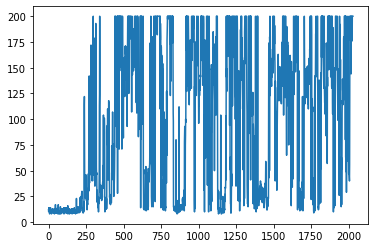

CPU times: user 19.6 s, sys: 388 ms, total: 19.9 s
Wall time: 20.3 s


In [27]:
%%time
logging.ENV.debug_verbosity = 4
policy = policy_impl.GreedyPolicy()
runner.Run(env=env, qfunc=qfunc, policy=policy, num_of_episodes=30)

## A3C

In [111]:
running_environment.ForceCpuForTheRun()

In [118]:
batch_size = 64  # used in qfunc and runner.
env = environment_impl.GymEnvironment(gym.make('CartPole-v0'))
brain = a3c_impl.A3C(
    model=a3c_impl.CreateModel(
        state_shape=env.GetStateShape(),
        action_space_size=env.GetActionSpaceSize(),
        hidden_layer_sizes=(12,),
    )
)

[19:31:54] c:\Workspace\git\deep_learning\engine\a3c_impl.py:46 WARNING: only one A3C instance can be active; the previous instance <deep_learning.engine.a3c_impl.A3C object at 0x00000173AF3442B0> is now deactivated.


In [119]:
%%time
logging.ENV.debug_verbosity = 6
runner = runner_impl.SimpleRunner()
runner.AddCallback(runner_extension_impl.ProgressTracer(report_every_num_of_episodes=1000))
runner.AddCallback(runner_extension_impl.ValueTracer(trace_states=use_states_1 + use_states_2, trace_actions=[0, 1]))

Wall time: 6.98 ms


[19:32:15] c:\Workspace\git\deep_learning\engine\runner_extension_impl.py:58 Episode 1000/20000: avg_reward = 10.31, avg_steps=9.31 (over 1000 episodes)
[19:32:30] c:\Workspace\git\deep_learning\engine\runner_extension_impl.py:58 Episode 2000/20000: avg_reward = 9.92, avg_steps=8.92 (over 1000 episodes)
[19:32:44] c:\Workspace\git\deep_learning\engine\runner_extension_impl.py:58 Episode 3000/20000: avg_reward = 9.82, avg_steps=8.82 (over 1000 episodes)
[19:32:59] c:\Workspace\git\deep_learning\engine\runner_extension_impl.py:58 Episode 4000/20000: avg_reward = 9.92, avg_steps=8.92 (over 1000 episodes)
[19:33:13] c:\Workspace\git\deep_learning\engine\runner_extension_impl.py:58 Episode 5000/20000: avg_reward = 9.85, avg_steps=8.85 (over 1000 episodes)
[19:33:27] c:\Workspace\git\deep_learning\engine\runner_extension_impl.py:58 Episode 6000/20000: avg_reward = 9.96, avg_steps=8.96 (over 1000 episodes)
[19:33:42] c:\Workspace\git\deep_learning\engine\runner_extension_impl.py:58 Episode 70

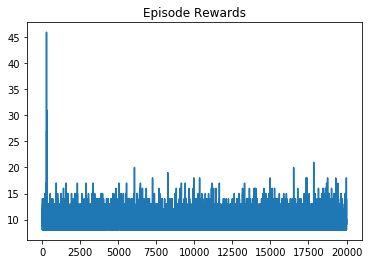

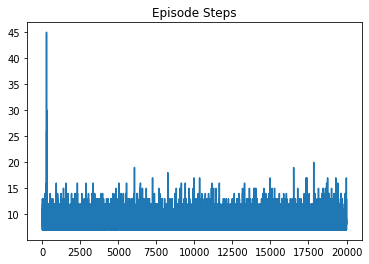

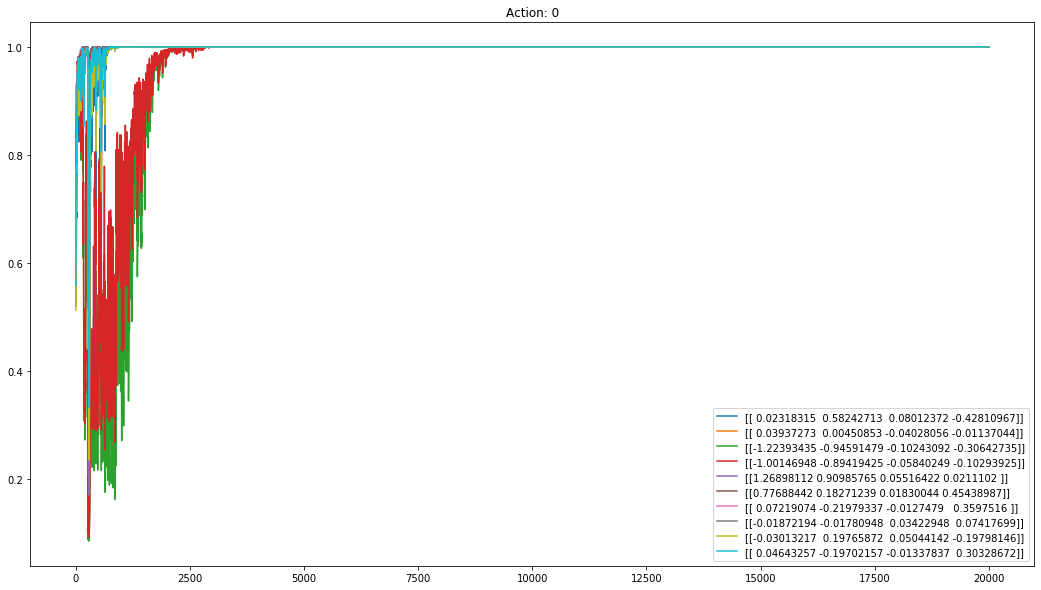

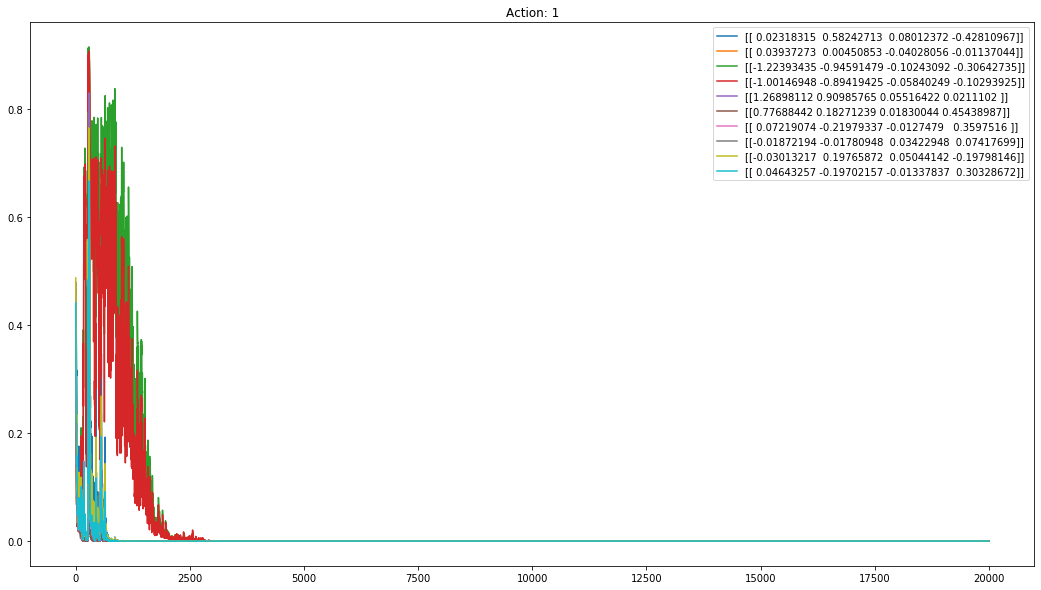

Wall time: 4min 50s


In [120]:
%%time
runner.Run(env=env, brain=brain, policy=policy_impl.GreedyPolicyWithRandomness(epsilon=0.1), num_of_episodes=20000)